In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [9]:
#inspect the tables
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [10]:
#get measurement column names
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [11]:
#get station column names
inspector.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# Exploratory Precipitation Analysis

In [31]:
# Find the most recent date in the data set.
result = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
result






('2017-08-23')

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago


# Perform a query to retrieve the data and precipitation scores
date_precipitation = session.query(Measurement.date, func.sum(Measurement.prcp)).group_by(Measurement.date).filter(Measurement.date > year_ago)\
    .order_by(Measurement.date).all()

len(date_precipitation)


365

In [41]:
# Save the query results as a Pandas DataFrame and set the index to the date column 
date_precipitation_df = pd.DataFrame(date_precipitation, columns=['Date', 'Precipitation'])
date_precipitation_df.head()



,Date,Precipitation
0,2016-08-24,9.33
1,2016-08-25,0.54
2,2016-08-26,0.10
3,2016-08-27,0.32
4,2016-08-28,3.10


In [46]:
# Sort the dataframe by date
    #already achieved by code 2 cells above

In [43]:
#change date datatype to a datetime object
date_precipitation_df['Date'] = pd.to_datetime(date_precipitation_df['Date'])

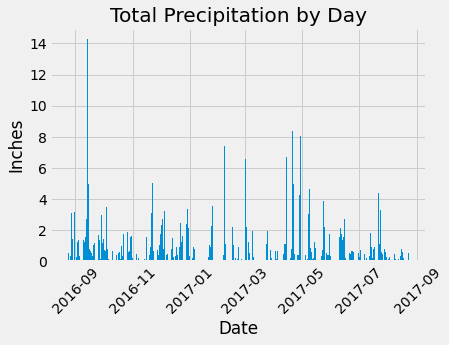

In [59]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(date_precipitation_df['Date'], date_precipitation_df['Precipitation'])
plt.xticks(rotation=45)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.title("Total Precipitation by Day")
plt.show()


In [45]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean_prcp = round(np.mean(date_precipitation_df["Precipitation"]), 2)
median_prcp = round(np.median(date_precipitation_df["Precipitation"]), 2)
var_prcp = round(np.var(date_precipitation_df["Precipitation"], ddof=0), 2)
sd_prcp = round(np.std(date_precipitation_df["Precipitation"], ddof=0), 2)

print(f"The mean daily precipitation in Hawaii from 8/24/2016 to 8/23/2017 was {mean_prcp} inches.")
print("-"*100)
print(f"The median daily precipitation in Hawaii from 8/24/2016 to 8/23/2017 was {median_prcp} inches.")
print("-"*100)
print(f"The variance of daily precipitation in Hawaii from 8/24/2016 to 8/23/2017 was {var_prcp} inches.")
print("-"*100)
print(f"The standard deviation of daily precipitation in Hawaii from 8/24/2016 to 8/23/2017 was {sd_prcp} inches.")




The mean daily precipitation in Hawaii from 8/24/2016 to 8/23/2017 was 0.97 inches.
----------------------------------------------------------------------------------------------------
The median daily precipitation in Hawaii from 8/24/2016 to 8/23/2017 was 0.4 inches.
----------------------------------------------------------------------------------------------------
The variance of daily precipitation in Hawaii from 8/24/2016 to 8/23/2017 was 3.15 inches.
----------------------------------------------------------------------------------------------------
The standard deviation of daily precipitation in Hawaii from 8/24/2016 to 8/23/2017 was 1.77 inches.


# Exploratory Station Analysis

In [60]:
# Design a query to calculate the total number stations in the dataset
station_result = session.query(Station.id).all()
station_count = len(station_result)
station_count


9

In [61]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count = session.query(Station.name, func.count(Station.id)\
   ).group_by(Station.name).filter(Measurement.station == Station.station)\
    .order_by(func.count(Station.id).desc()).all()
count

#Waihee had the most observations with 2772



[('WAIHEE 837.5, HI US', 2772),
 ('WAIKIKI 717.2, HI US', 2724),
 ('KANEOHE 838.1, HI US', 2709),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('MANOA LYON ARBO 785.2, HI US', 2612),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('PEARL CITY, HI US', 1372),
 ('UPPER WAHIAWA 874.3, HI US', 511)]

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs))\
    .group_by(Station.name).filter(Measurement.station == Station.station).filter(Station.name == 'WAIHEE 837.5, HI US')\
    .all()
print(f"The lowest temp recorded at Waihee is {lowest_temp[0]} degrees farenheit.")

highest_temp = session.query(func.max(Measurement.tobs))\
    .group_by(Station.name).filter(Measurement.station == Station.station).filter(Station.name == 'WAIHEE 837.5, HI US')\
    .all()
print(f"The highest temp recorded at Waihee is {highest_temp[0]} degrees farenheit.")

average_temp = session.query(func.avg(Measurement.tobs))\
    .group_by(Station.name).filter(Measurement.station == Station.station).filter(Station.name == 'WAIHEE 837.5, HI US')\
    .all()
print(f"The average temp recorded at Waihee is {average_temp[0]} degrees farenheit.")



The lowest temp recorded at Waihee is (54.0,) degrees farenheit.
The highest temp recorded at Waihee is (85.0,) degrees farenheit.
The average temp recorded at Waihee is (71.66378066378067,) degrees farenheit.


In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
waihee_temp = session.query(func.avg(Measurement.tobs)).group_by(Measurement.date).filter(Measurement.date > year_ago)\
    .order_by(Measurement.date).all()
waihee_temp


[(77.57142857142857),
 (79.42857142857143),
 (80.5),
 (76.83333333333333),
 (76.0),
 (78.71428571428571),
 (77.33333333333333),
 (78.28571428571429),
 (80.16666666666667),
 (79.42857142857143),
 (77.4),
 (77.0),
 (79.5),
 (75.66666666666667),
 (75.83333333333333),
 (78.71428571428571),
 (77.42857142857143),
 (76.8),
 (77.2),
 (76.85714285714286),
 (77.57142857142857),
 (75.85714285714286),
 (77.85714285714286),
 (77.85714285714286),
 (78.6),
 (78.6),
 (76.57142857142857),
 (75.85714285714286),
 (76.66666666666667),
 (76.57142857142857),
 (78.57142857142857),
 (80.16666666666667),
 (79.0),
 (77.71428571428571),
 (78.0),
 (78.28571428571429),
 (78.85714285714286),
 (78.0),
 (77.5),
 (78.16666666666667),
 (78.57142857142857),
 (78.28571428571429),
 (78.71428571428571),
 (77.85714285714286),
 (77.42857142857143),
 (76.6),
 (76.4),
 (75.0),
 (78.28571428571429),
 (78.83333333333333),
 (78.57142857142857),
 (78.0),
 (77.66666666666667),
 (78.0),
 (77.14285714285714),
 (78.42857142857143),
 (

In [28]:
#unpack waihee temp list of tuples
temps = [] 
for t in waihee_temp: 
    for x in t: 
        temps.append(x) 
temps

[77.57142857142857,
 79.42857142857143,
 80.5,
 76.83333333333333,
 76.0,
 78.71428571428571,
 77.33333333333333,
 78.28571428571429,
 80.16666666666667,
 79.42857142857143,
 77.4,
 77.0,
 79.5,
 75.66666666666667,
 75.83333333333333,
 78.71428571428571,
 77.42857142857143,
 76.8,
 77.2,
 76.85714285714286,
 77.57142857142857,
 75.85714285714286,
 77.85714285714286,
 77.85714285714286,
 78.6,
 78.6,
 76.57142857142857,
 75.85714285714286,
 76.66666666666667,
 76.57142857142857,
 78.57142857142857,
 80.16666666666667,
 79.0,
 77.71428571428571,
 78.0,
 78.28571428571429,
 78.85714285714286,
 78.0,
 77.5,
 78.16666666666667,
 78.57142857142857,
 78.28571428571429,
 78.71428571428571,
 77.85714285714286,
 77.42857142857143,
 76.6,
 76.4,
 75.0,
 78.28571428571429,
 78.83333333333333,
 78.57142857142857,
 78.0,
 77.66666666666667,
 78.0,
 77.14285714285714,
 78.42857142857143,
 77.57142857142857,
 76.83333333333333,
 76.85714285714286,
 77.6,
 76.83333333333333,
 75.28571428571429,
 77.0,


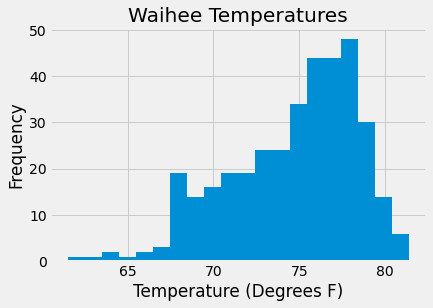

In [62]:
#plot temperature results as a histogram
plt.hist(temps, bins=20)
plt.title("Waihee Temperatures")
plt.xlabel("Temperature (Degrees F)")
plt.ylabel("Frequency")
plt.show()


# Close session

In [63]:
# Close Session
session.close()